# Nuclear reflectivity

-------------------------------------------------------------------------------------------
 NEXUS WARNING in NuclearReflectivity
          At angle 0.995000 and at energy 14412.497000.
          Wavevector kz * roughness.value = 0.380498 > 0.3 but should be << 1.
          Encountered in Sample.id: simple layers  - Layer.id: C  - Layer.roughness: 0.300000
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
 NEXUS WARNING in NuclearReflectivity
          At angle 0.995000 and at energy 14412.497000.
          Wavevector kz * roughness.value = 0.380498 > 0.3 but should be << 1.
          Encountered in Sample.id: simple layers  - Layer.id: Fe  - Layer.roughness: 0.300000
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
 NEXU

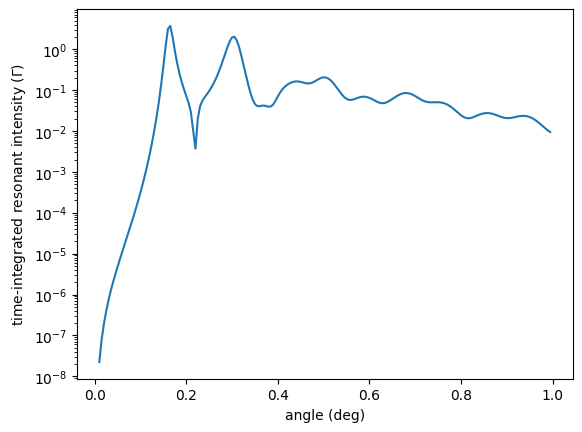

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

# ------------------------- Fe layer --------------------------

mat_Fe = nx.Material.Template(nx.lib.material.Fe_enriched)

site = nx.Hyperfine(magnetic_field = 33,
                    magnetic_theta = 90,
                    magnetic_phi = 0)

mat_Fe.hyperfine_sites = [site]

lay_Fe = nx.Layer(id = "Fe",
                  material = mat_Fe,
                  thickness = 1.5,
                  roughness = 0.3
                  )

# ----------------------------- Pt layers -----------------------------
lay_Pt_top = nx.Layer(id = "Pt top",
                material = nx.Material.Template(nx.lib.material.Pt),
                thickness = 2,
                roughness = 0.2
                )

lay_Pt = nx.Layer(id = "Pt",
                material = nx.Material.Template(nx.lib.material.Pt),
                thickness = 15,
                roughness = 0.2
                )

# -------------------------- C layer ---------------------------
lay_C = nx.Layer(id = "C",
                material = nx.Material.Template(nx.lib.material.C),
                thickness = 10,
                roughness = 0.3
                )

# --------------------- substrate ---------------------------------
lay_substrate = nx.Layer(id = "Si sub",
                material = nx.Material.Template(nx.lib.material.Si),
                thickness = nx.inf,
                roughness = 0.2
                )

# --------------------- sample ---------------------------------
# is defined in reflection here
sample = nx.Sample(id = "simple layers",
                   layers = [lay_Pt_top,
                             lay_C,
                             lay_Fe,
                             lay_C,
                             lay_Pt,
                             lay_substrate],
                    geometry = "r",
                    length = 10,
                    roughness = "a")

beam  = nx.Beam(fwhm = 0.2)

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57,
                    id = "my exp")

angles = np.arange(0.01, 1, 0.005)

nuc_ref = nx.NuclearReflectivity(experiment = exp,
                                 sample = sample,
                                 angles = angles,
                                 time_start = 10,
                                 time_stop  = 192,
                                 time_step = 0.2,
                                 max_detuning = 400,
                                 intensity_data = [],
                                 scaling = "auto",
                                 fit_weight = 1.0,
                                 resolution = 0.001)

plt.semilogy(angles, nuc_ref())
plt.xlabel('angle (deg)')
plt.ylabel(r'time-integrated resonant intensity ($\Gamma$)')
plt.show()

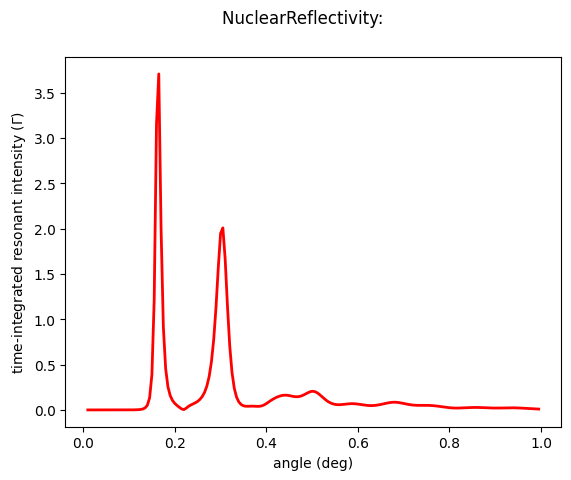

In [2]:
nuc_ref.Plot()

-------------------------------------------------------------------------------------------
 NEXUS WARNING in NuclearReflectivityEnergy
          At angle 0.995000 and at energy 14412.497000.
          Wavevector kz * roughness.value = 0.380498 > 0.3 but should be << 1.
          Encountered in Sample.id: simple layers  - Layer.id: C  - Layer.roughness: 0.300000
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
 NEXUS WARNING in NuclearReflectivityEnergy
          At angle 0.995000 and at energy 14412.497000.
          Wavevector kz * roughness.value = 0.380498 > 0.3 but should be << 1.
          Encountered in Sample.id: simple layers  - Layer.id: Fe  - Layer.roughness: 0.300000
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------

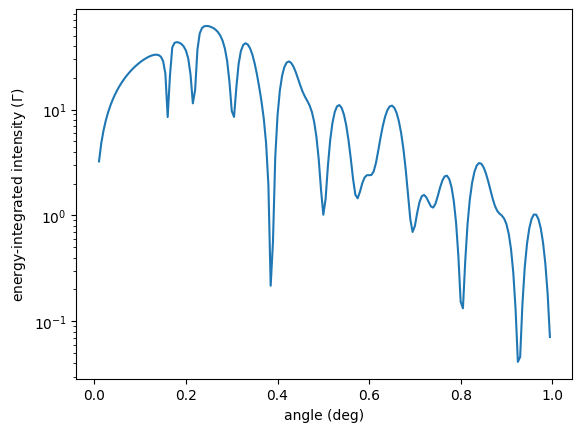

In [3]:
detuning = np.linspace(-200, 200, 1001)

nuc_ref = nx.NuclearReflectivityEnergy(experiment = exp,
                                           sample = sample,
                                           angles = angles,
                                           detuning = detuning,
                                           intensity_data = [],
                                           scaling = "auto",
                                           background = 0,
                                           fit_weight = 1.0,
                                           resolution = 0.001,
                                           time_gate =[])

plt.semilogy(angles, nuc_ref())
plt.xlabel('angle (deg)')
plt.ylabel(r'energy-integrated intensity ($\Gamma$)')
plt.show()

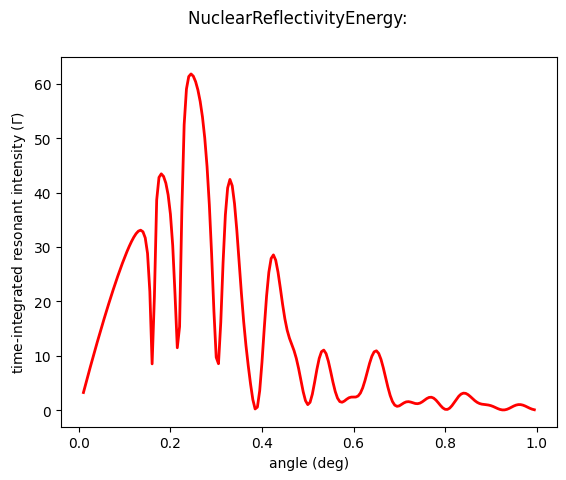

In [4]:
nuc_ref.Plot()